In [1]:
import numpy as np
import xrayutilities as xu
import matplotlib.pyplot as plt
from silx.io.specfile import SpecFile,Scan

# %matplotlib nbagg


In [2]:
Nd = xu.materials.elements.Nd
Ni = xu.materials.elements.Ni
O = xu.materials.elements.O

NNO = xu.materials.Crystal(
    "NNO", xu.materials.SGLattice(123, 3.905, 3.30, atoms=[Nd, Ni,O],
                                  pos=['1d', '1a','2f']))

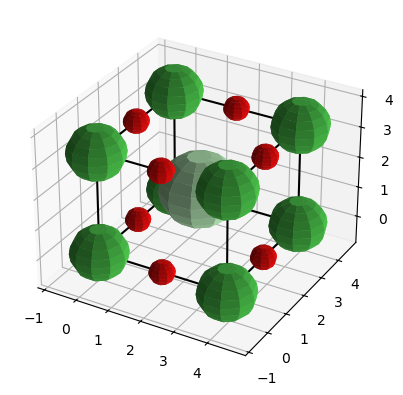

In [3]:
# plt.figure()
NNO.show_unitcell()
plt.show()

In [4]:
# qconversion = xu.QConversion(sampleAxis = ['x+','y-','x+'], detectorAxis = ['x+'], r_i = [0,1,0], en = 8333)

# hxrd = xu.HXRD( [1,0,0], [0,0,1], qconv =  qconversion)

# om, chi, phi, tt = hxrd.Q2Ang(NNO.Q(1, 0, 3))


In [5]:
# print(om, chi, phi, tt)

In [ ]:
# hxrd.Ang2Q.init_area(
#         'x+', 'z+',
#         cch1=50, cch2=50,
#         Nch1=25, Nch2=25,
#         pwidth1=0.075, pwidth2=0.075,
#         distance=500
#     )

In [ ]:
# angle_values =   [om, chi, phi, tt]   #[[26.056],  [13.028]]
# qx, qy, qz = hxrd.Ang2Q.area(*angle_values, UB=np.array([[1.609010322,0,0],[0,1.609010322,0],[0,0,1.903995548]]))

In [4]:
print(np.nanmean(qx),np.nanmean(qy),np.nanmean(qz))

NameError: name 'qx' is not defined

In [ ]:
# # (om, chi, phi, tt)

# UB = [[-0.02293616221, -1.606337814, -0.1062826831], [1.608826145, -0.02335568439, 0.008126644255], [-0.008159914442, -0.08970817471, 1.901009467]]

# angle_values =   [12.93, 93.2-90, 0, 25.35]   #[[26.056],  [13.028]]


# angle_values =   [44.68, -71.07+90, 179.8399978, 89.27597656]


# qx, qy, qz = hxrd.Ang2Q.area(*angle_values, UB=UB)

# print(np.nanmean(qx),np.nanmean(qy),np.nanmean(qz))

In [ ]:
# print(np.nanmean(qx),np.nanmean(qy),np.nanmean(qz))

In [ ]:
# plt.figure()
# plt.subplot(131)
# plt.imshow(qx)
# plt.title('qx')

# plt.subplot(132)
# plt.imshow(qy)
# plt.title('qy')

# plt.subplot(133)
# plt.imshow(qz)
# plt.title('qz')

# plt.show()

# checking scans

In [5]:
scan_num = 9
# sf = SpecFile(r"D:\Stanford\My Drive\temp\202308_SSRL_XRD_nickelate\data\NNO_STO\cdw_mesh\cdw_mesh")
sf = SpecFile(r"D:\Stanford\My Drive\temp\202308_SSRL_XRD_nickelate\data\NNO_STO\find_ubr\find_ubr")
scan = sf[scan_num-1]
print('scan number: ' + str(scan.number) + ', length: ' + str(np.shape(scan.data)[1]))
# UB = np.array(scan.header[5].split(' ')[-9:]).astype(float).reshape([3,3])
# angles = np.array(scan.header[8].split(' ')[1:-2]).astype(float)

for line in scan.header:
    if line[:3] == '#G3':
        UB = np.array(line.split(' ')[-9:]).astype(float).reshape([3,3])
    if line[:3] == '#P0':
        angles = np.array(line.split(' ')[1:-2]).astype(float)

try:
    tt = scan.data_column_by_name('del')
except:
    tt = angles[0] * np.ones(np.shape(scan.data)[1])
    
try:
    eta = scan.data_column_by_name('eta')
except:
    eta = angles[1] * np.ones(np.shape(scan.data)[1])

try:
    chi = scan.data_column_by_name('chi')-90
except:
    chi = angles[2] * np.ones(np.shape(scan.data)[1])-90
    
try:
    phi = scan.data_column_by_name('phi')
except:
    phi = angles[3] * np.ones(np.shape(scan.data)[1])

scan number: 9, length: 31


In [6]:
qconversion = xu.QConversion(sampleAxis = ['x+','y-','x+'], detectorAxis = ['x+'], r_i = [0,1,0], en = 8333)

hxrd = xu.HXRD( [1,0,0], [0,0,1], qconv =  qconversion)

hxrd.Ang2Q.init_area(
        'x+', 'z+',
        cch1=50, cch2=50,
        Nch1=25, Nch2=25,
        pwidth1=0.075, pwidth2=0.075,
        distance=500
    )

In [7]:
angle_values =   [eta, chi, phi, tt]   #[[26.056],  [13.028]]
qx, qy, qz = hxrd.Ang2Q.area(*angle_values, UB=UB)

<IPython.core.display.Javascript object>


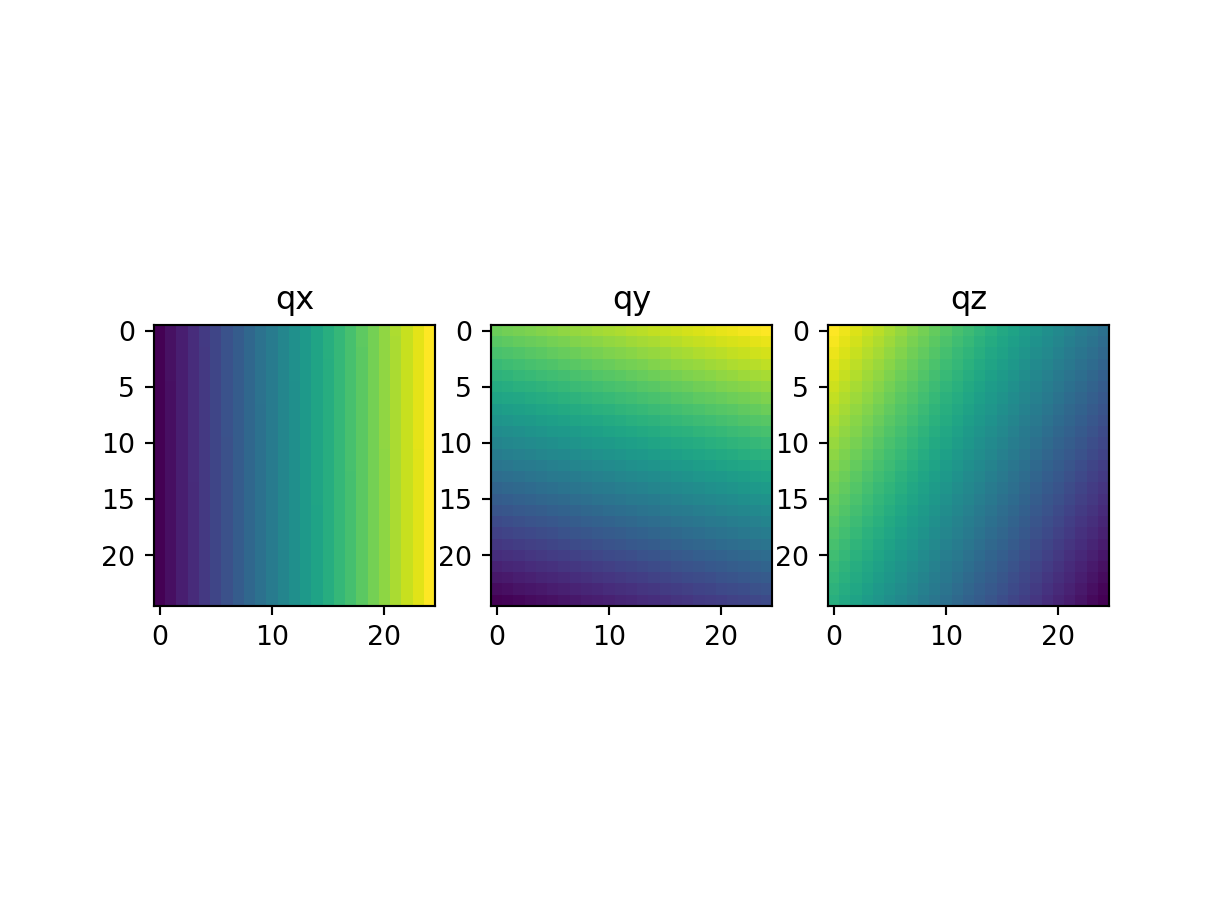

<IPython.core.display.Javascript object>


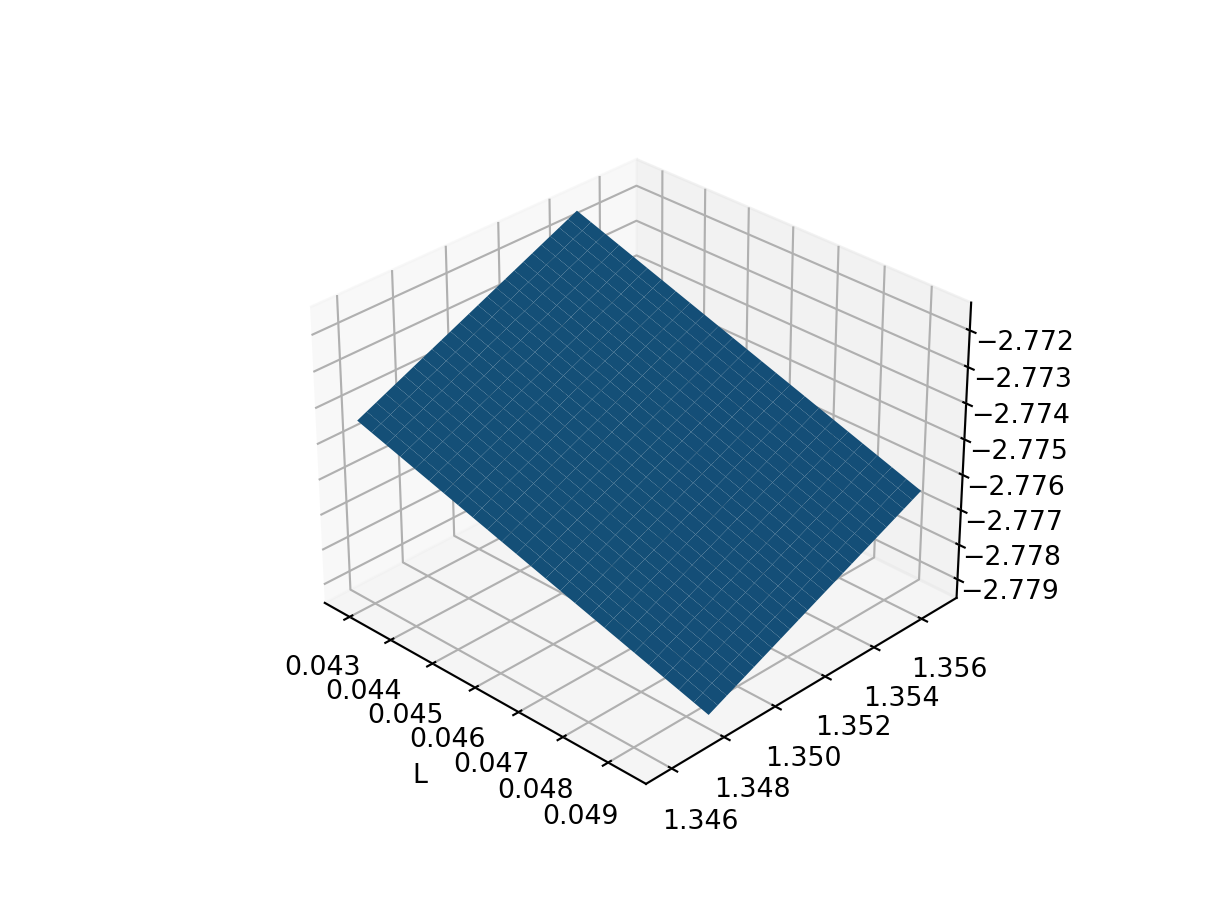

In [8]:
idx = 15
plt.figure()
plt.subplot(131)
plt.imshow(qx[idx])
plt.title('qx')

plt.subplot(132)
plt.imshow(qy[idx])
plt.title('qy')

plt.subplot(133)
plt.imshow(qz[idx])
plt.title('qz')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(qx[idx],qy[idx],qz[idx])
plt.xlabel('H')
plt.xlabel('K')
plt.xlabel('L')

plt.show()